In [1]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the dataset
iris_data = pd.read_csv('C:/Users/user/Downloads/Iris.csv')
# Print first 5 rows of the iris dataset
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# print last 5 rows of the iris dataset
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# print the dimensions of the iris dataset
iris_data.shape

(150, 6)

In [5]:
# print the information about the iris dataset including data types, non-null counts, and memory usag.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Iris dataset contains 5 features, 1 Id Column and 150 rows (Out of which 4 features are float64, 1 feature is integer, 1 feature is object datatype)

In [6]:
#print all the column Names in Iris Dataset
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Checking Null Values
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values found.

In [8]:
# Checking Duplicats
iris_data.duplicated().sum()

0

No duplicate Values found.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


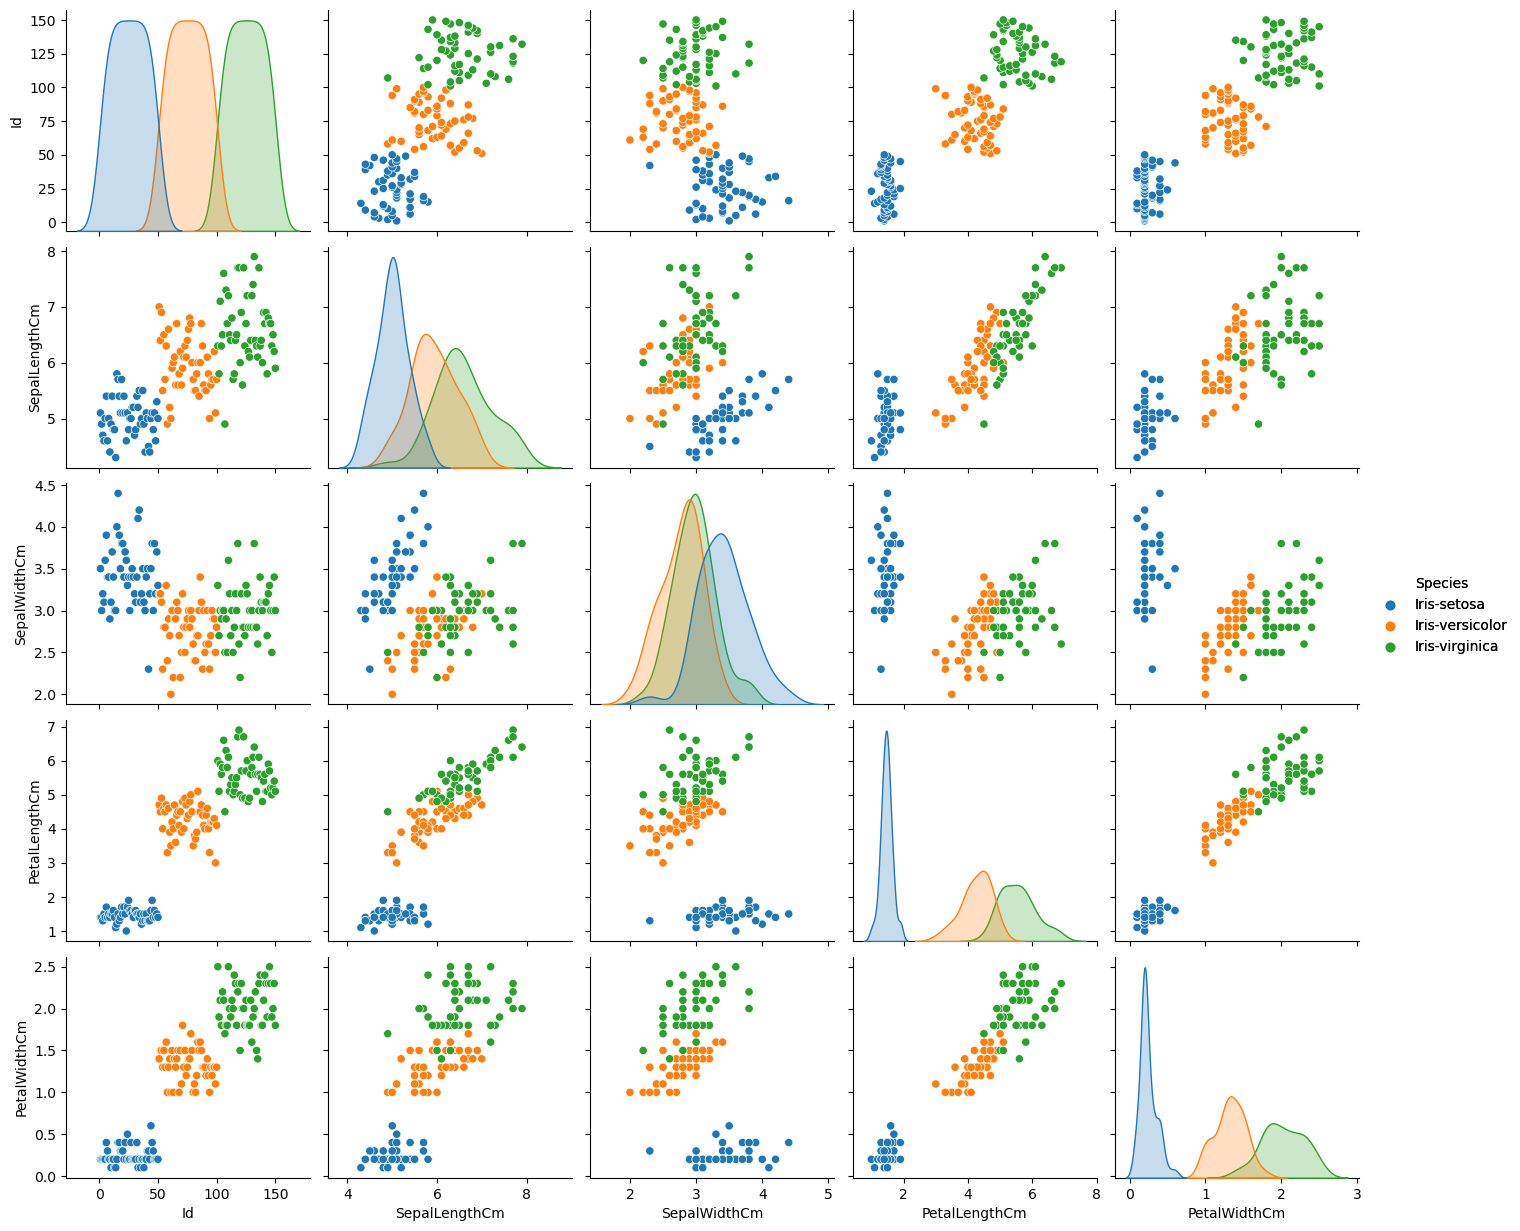

In [9]:
# creates a pair plot for the numerical columns in the iris dataset
sns.pairplot(iris_data, hue='Species').add_legend()

 Each scatterplot represents the relationship between two variables, and the points are colored based on the 'Species' column.

In [10]:
# Droping the unnecessary :ID column 
iris_data = iris_data.drop('Id', axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# print the unique values in a Species column
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Use pd.get_dummies for one-hot encoding
iris_data_encoded = pd.get_dummies(iris_data, columns=['Species'], prefix=['Species'])

In [13]:
iris_data_encoded.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


 One-hot encoding converts categorical variables in a Speicies column into binary vectors, creating separate columns for each category.

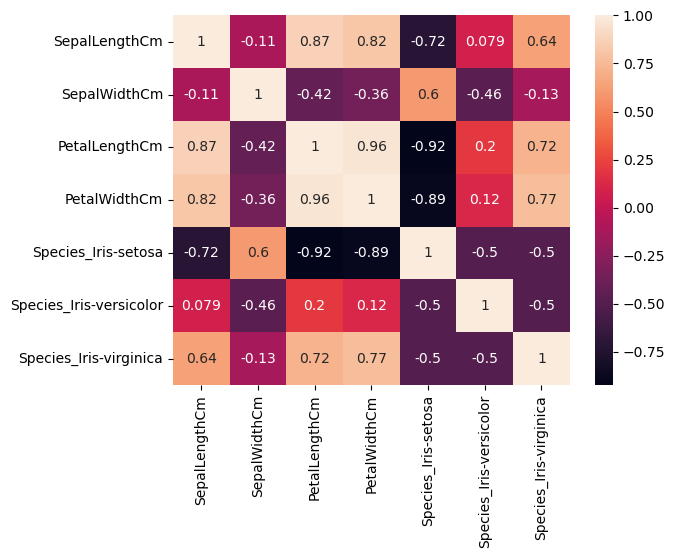

In [14]:
# Create a heatmap of the correlation matrix
sns.heatmap(iris_data_encoded.corr(), annot=True)
plt.show()

In [15]:
#Importing Necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Train Test Split
X = iris_data.drop(['Species'],axis=1)
y = iris_data['Species']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=40)

In [18]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [19]:
# Create an empty list to store results
results_list = []

# Train and Evaluate Models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Get classification report as a dictionary
    report_dict = classification_report(y_test, predictions, output_dict=True)

    # Create a dictionary with model results
    model_results = {
        'Model Name': model_name,
        'Accuracy': report_dict['accuracy'],
        'Precision': report_dict['weighted avg']['precision'],
        'Recall': report_dict['weighted avg']['recall'],
        'F1-score': report_dict['weighted avg']['f1-score']
    }

    # Append the dictionary to the list
    results_list.append(model_results)

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the Model comparison matrix
print("Model Comparison Matrix:")
print(results_df)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Comparison Matrix:
            Model Name  Accuracy  Precision  Recall  F1-score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2        Random Forest       1.0        1.0     1.0       1.0
3                  SVM       1.0        1.0     1.0       1.0


All models achieved perfect scores (1.0) across all metrics: Accuracy, Precision, Recall, and F1-score. This might be an indication that the models are performing exceptionally well on the given dataset.